In [1]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

In [2]:
mnist = fetch_openml('mnist_784', version=1)

In [3]:
# mnist is a dictionary, with the following keys 
print(mnist.keys())
# Use mnist['DESCR'] to read more information about the data

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [4]:
#Extract features and labels
X = np.c_[mnist['data']]
y = np.c_[mnist['target']].reshape(-1)

In [5]:
# investigate data
print(X.shape) # 70000 images, with 784 pixels
print(y.shape) # 70000 labels of which number the picture is of

(70000, 784)
(70000,)


In [6]:
# extract single digit
instance_index = 2
single_digit = X[instance_index,:]
single_digit_image = single_digit.reshape(28,28)

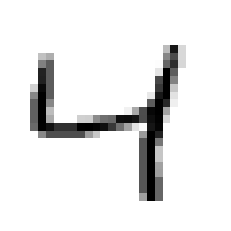

In [7]:
# plot the digit
import matplotlib.pyplot as plt
plt.imshow(single_digit_image, cmap='binary')
plt.axis('off')
plt.show()

In [8]:
# each instance is a and drawn digit between 0 and 1 (28X28 pixels equals 784 flatten pixels)
print(y[instance_index])
print(type(y[instance_index])) # every label is a string

4
<class 'str'>


In [9]:
# change labels to number
y=y.astype(np.uint8)
print(type(y[instance_index])) # every label is now numeric

<class 'numpy.uint8'>


In [10]:
# split your data into train and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=420)

In [11]:
# Dataprep the features such that it is between 0 and 1. (hint: this is quite easy as the maximum 
# pixel illumination is 255) 
for count, i in enumerate(X_train):
    X_train[count] = i/255

In [12]:
# Create a new variable y_train_is5, and y_test_is5, which is 0 for all y values except for when y is 5.
y_train_is5 = []
for i in y_train:
    if i == 5:
        y_train_is5.append(1)
    else:
        y_train_is5.append(0)
y_train_is5 = np.array(y_train_is5)

y_test_is5 = []
for i in y_test:
    if i == 5:
        y_test_is5.append(1)
    else:
        y_test_is5.append(0)
y_test_is5 = np.array(y_test_is5)

In [13]:
# Create a logistic regression model, and train the data to predict if the image is a 5 or not.
model_is5 = LogisticRegression(max_iter=1000)
model_is5.fit(X=X_train, y=y_train_is5)

LogisticRegression(max_iter=1000)

In [14]:
# Prep test table
for count, i in enumerate(X_test):
    X_test[count] = i/255

In [15]:
# Investigate the confusion matrix, precision and recall. Is this good or bad? 
y_pred_is5 = model_is5.predict(X_test)
cmatrix = confusion_matrix(y_test_is5, y_pred_is5)
print(cmatrix)
print(f'Precision {cmatrix[1][1]/(cmatrix[1][1]+cmatrix[0][1])}')
print(f'Recall {cmatrix[1][1]/(cmatrix[1][1]+cmatrix[1][0])}')
print(classification_report(y_test_is5, y_pred_is5))


[[6333   49]
 [ 109  509]]
Precision 0.9121863799283154
Recall 0.8236245954692557
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      6382
           1       0.91      0.82      0.87       618

    accuracy                           0.98      7000
   macro avg       0.95      0.91      0.93      7000
weighted avg       0.98      0.98      0.98      7000



In [16]:
y_pred_false = [0] * len(y_test_is5)
cmatrix_false = confusion_matrix(y_test_is5, y_pred_false)
print(cmatrix_false)
print(f'Precision {cmatrix_false[1][1]/(cmatrix_false[1][1]+cmatrix_false[0][1])}')
print(f'Recall {cmatrix_false[1][1]/(cmatrix_false[1][1]+cmatrix_false[1][0])}')
print(classification_report(y_test_is5, y_pred_false))

[[6382    0]
 [ 618    0]]
Precision nan
Recall 0.0
              precision    recall  f1-score   support

           0       0.91      1.00      0.95      6382
           1       0.00      0.00      0.00       618

    accuracy                           0.91      7000
   macro avg       0.46      0.50      0.48      7000
weighted avg       0.83      0.91      0.87      7000



C:\Users\Eivin\AppData\Local\Temp\ipykernel_15344\2842554505.py:4: RuntimeWarning: invalid value encountered in longlong_scalars
  print(f'Precision {cmatrix_false[1][1]/(cmatrix_false[1][1]+cmatrix_false[0][1])}')
C:\Users\Eivin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eivin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Eivin\AppData\Roaming\Python\Python310\site-packages\sklearn\metrics\_classification.py:1327: UndefinedMetri

In [17]:
model_is5_proba = model_is5.predict_proba(X=X_test)

threshold = 0.1
pred_rate = []
tn = 0
fp = 0
fn = 0
tp = 0

for count, i in enumerate(model_is5_proba):
    if i[1] > threshold:
        pred_rate.append(1)
    else:
        pred_rate.append(0)

for count, i in enumerate(pred_rate):
    if i == 1 and y_test_is5[count] == 1:
        tp += 1
    elif i == 1 and y_test_is5[count] == 0:
        fp += 1
    elif i == 0 and y_test_is5[count] == 1:
        fn += 1
    else:
        tn += 1

print(f'True Negative: {tn}')
print(f'False Positive: {fp}')
print(f'False Negative: {fn}')
print(f'True Positive :{tp}')

print(f'Precision {tp/(tp+fp)}')
print(f'Recall {tp/(tp+fn)}')

cost_fp = 5 * fp
cost_fn = 100 * fn

print(f'Cost of error: {cost_fp + cost_fn}')


True Negative: 6001
False Positive: 381
False Negative: 30
True Positive :588
Precision 0.6068111455108359
Recall 0.9514563106796117
Cost of error: 4905


In [51]:
#y_test_is5_oversampling = [count for count, i in enumerate(y_test_is5) if i == 1]
X_train_True = []
y_train_True = []
for count, x in enumerate(y_train_is5):
    if x == 1:
        X_train_True.append(X_train[count])
        y_train_True.append(y_train[count])

X_train_True = np.c_[X_train_True]
y_train_True = np.c_[y_train_True]

print(y_train_True)



[[5]
 [5]
 [5]
 ...
 [5]
 [5]
 [5]]
